In [1]:
#import dependencies
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import time
import requests
import io
import os
import matplotlib.pyplot as plt

# Import ESG Data

In [2]:
# Import the CSV of ESG
file_to_load = os.path.join("Resources", "Stocks_with_ESG.csv")
ESG_df = pd.read_csv(file_to_load)
ESG_df

,TICKER,Society_N,Society_P,Jobs_N,Jobs_P,Taxes_N,Taxes_P,Societal_Infrastructure_N,Societal_Infrastructure_P,Societal_Stability_N,...,Biodiversity_N,Biodiversity_P,Waste_N,Waste_P,Millennials,Most Wanted Workforce,Society First,Knowledge First,Health First,Net Impact Ratio
0,WDAY,-0.01,3.79,0.0,1.11,0.0,2.28,0.0,0.03,-0.00,...,-0.02,0.0,-0.06,0.00,0.527,0.426,0.426,0.449,0.692,0.471
1,PANW,-0.07,4.33,0.0,0.84,0.0,1.85,0.0,0.12,-0.06,...,-0.01,0.0,-0.17,0.00,0.504,0.389,0.389,0.418,0.765,0.419
2,ABMD,-0.00,2.71,0.0,0.91,0.0,1.70,0.0,0.10,-0.00,...,-0.01,0.0,-0.43,0.00,0.678,0.551,0.551,0.312,0.506,0.654
3,ADBE,-0.06,3.40,0.0,0.91,0.0,2.29,0.0,0.12,-0.06,...,-0.01,0.0,-0.15,0.00,0.393,0.253,0.253,0.253,0.649,0.328
4,AMD,-0.05,1.97,0.0,0.68,0.0,1.07,0.0,0.08,-0.05,...,-0.03,0.0,-0.30,0.01,0.443,0.199,0.199,0.180,0.708,0.270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,WDC,-0.09,2.77,0.0,1.10,0.0,1.50,0.0,0.11,-0.08,...,-0.02,0.0,-0.29,0.00,0.404,0.216,0.216,0.180,0.681,0.274
109,WLTW,-0.19,2.21,0.0,0.79,0.0,1.04,0.0,0.28,-0.06,...,-0.02,0.0,-0.12,0.02,0.007,0.354,0.354,0.178,0.215,0.244
110,XLNX,-0.07,2.51,0.0,0.80,0.0,1.54,0.0,0.11,-0.07,...,-0.02,0.0,-0.32,0.00,0.512,0.332,0.332,0.275,0.781,0.374
111,ZBRA,-0.11,2.92,0.0,0.88,0.0,1.45,0.0,0.54,-0.09,...,-0.01,0.0,-0.60,0.00,0.398,0.133,0.133,0.192,0.650,0.207


In [3]:
# Get total ESG code 
total_ESG=ESG_df.sum(axis=1)
total_ESG 

/Users/yicongluo/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0       8.211
1       9.704
2      11.532
3       6.529
4       3.919
        ...  
108     4.491
109     3.002
110     6.306
111     3.493
112     2.943
Length: 113, dtype: float64

# P/E valution 

In [4]:
# Import the CSV
file_to_load = os.path.join("Resources", "Stocks_with_Selected.csv")
df = pd.read_csv(file_to_load)
df

,TICKER,Name,Sector,P/E,P/S,Dividend Growth Rate,MV Price
0,GOOG,Alphabet (Class C),Communication Services,112.2,2313,3%,1
1,CHTR,Charter Communications,Communication Services,112.2,2313,3%,2
2,CMCSA,Comcast,Communication Services,112.2,2313,3%,3
3,DISCA,Discovery (Series A),Communication Services,112.2,2313,3%,4
4,DISH,Dish Network,Communication Services,112.2,2313,3%,5
...,...,...,...,...,...,...,...
108,EQIX,Equinix,Real Estate,112.2,2313,3%,109
109,HST,Host Hotels & Resorts,Real Estate,112.2,2313,3%,110
110,SBAC,SBA Communications,Real Estate,112.2,2313,3%,111
111,LNT,Alliant Energy,Utilities,112.2,2313,3%,112


In [5]:
# Get average P/E and P/S 
average_df=df.groupby('Sector').mean()
average_df


,P/E,P/S,MV Price
Sector,,,
Communication Services,463.183333,2127.916667,6.5
Consumer Discretionary,774.460000,1904.700000,17.5
Consumer Staples,112.200000,2313.000000,23.0
Financials,112.200000,2313.000000,30.0
Health Care,106.835294,2054.117647,45.0
Industrials,112.200000,2313.000000,56.0
Information Technology,5260.852000,2754.000000,83.5
Real Estate,112.200000,2313.000000,110.0
Utilities,112.200000,2313.000000,112.5


In [6]:
# Delete the MV Price
del average_df['MV Price']
average_df

,P/E,P/S
Sector,,
Communication Services,463.183333,2127.916667
Consumer Discretionary,774.460000,1904.700000
Consumer Staples,112.200000,2313.000000
Financials,112.200000,2313.000000
Health Care,106.835294,2054.117647
Industrials,112.200000,2313.000000
Information Technology,5260.852000,2754.000000
Real Estate,112.200000,2313.000000
Utilities,112.200000,2313.000000


In [7]:
#Merge the industried average to CSV
stock_df = pd.merge(df, average_df, on='Sector',suffixes=['','_In_Average'])
stock_df

,TICKER,Name,Sector,P/E,P/S,Dividend Growth Rate,MV Price,P/E_In_Average,P/S_In_Average
0,GOOG,Alphabet (Class C),Communication Services,112.2,2313,3%,1,463.183333,2127.916667
1,CHTR,Charter Communications,Communication Services,112.2,2313,3%,2,463.183333,2127.916667
2,CMCSA,Comcast,Communication Services,112.2,2313,3%,3,463.183333,2127.916667
3,DISCA,Discovery (Series A),Communication Services,112.2,2313,3%,4,463.183333,2127.916667
4,DISH,Dish Network,Communication Services,112.2,2313,3%,5,463.183333,2127.916667
...,...,...,...,...,...,...,...,...,...
108,EQIX,Equinix,Real Estate,112.2,2313,3%,109,112.200000,2313.000000
109,HST,Host Hotels & Resorts,Real Estate,112.2,2313,3%,110,112.200000,2313.000000
110,SBAC,SBA Communications,Real Estate,112.2,2313,3%,111,112.200000,2313.000000
111,LNT,Alliant Energy,Utilities,112.2,2313,3%,112,112.200000,2313.000000


In [8]:
# Use P/S and P/E to compare the average

# Get % rate difference between P/E of stock and P/E of industry
PE_rate=(stock_df['P/E_In_Average']-stock_df['P/E'])/stock_df['P/E']

# Use the P/E valuation to get the stock price
PE_valuation_Stock_Price=(1+PE_rate)*stock_df['P/E_In_Average']
PE_valuation_Stock_Price

0      1912.110519
1      1912.110519
2      1912.110519
3      1912.110519
4      1912.110519
          ...     
108     112.200000
109     112.200000
110     112.200000
111     112.200000
112     112.200000
Length: 113, dtype: float64

In [9]:
# Get Difference bewteen MV Price
Diff_PE=PE_valuation_Stock_Price-stock_df['MV Price']
Diff_PE

0      1911.110519
1      1910.110519
2      1909.110519
3      1908.110519
4      1907.110519
          ...     
108       3.200000
109       2.200000
110       1.200000
111       0.200000
112      -0.800000
Length: 113, dtype: float64

In [10]:
# Create Dataframe for P/E valuation, Market value price and difference
pd.DataFrame({"Predicted Price": PE_valuation_Stock_Price, "MV Price": stock_df['MV Price'], "Difference": Diff_PE})[["Predicted Price", "MV Price", "Difference"]]

,Predicted Price,MV Price,Difference
0,1912.110519,1,1911.110519
1,1912.110519,2,1910.110519
2,1912.110519,3,1909.110519
3,1912.110519,4,1908.110519
4,1912.110519,5,1907.110519
...,...,...,...
108,112.200000,109,3.200000
109,112.200000,110,2.200000
110,112.200000,111,1.200000
111,112.200000,112,0.200000


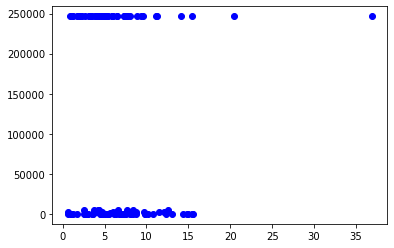

In [11]:
# Set X,y for Linear Regression
from sklearn.linear_model import LinearRegression
X =total_ESG.values.reshape(-1, 1)
y = PE_valuation_Stock_Price.values.reshape(-1, 1)


In [12]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [13]:
# fit the model
model.fit(X,y)
print(model)

LinearRegression()


In [14]:

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-510.81031992]]
y-axis intercept:  [108767.77443388]


In [15]:
y_pred = model.predict(X)
print(y_pred.shape)

(113, 1)


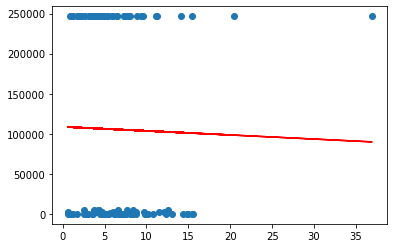

In [16]:
# Plot the Graph of Liner Regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()